In [1]:
import sys
import datetime
import pandas as pd

sys.path.append('../../')
from src.util.functions import Functions
from src.visualize.visualizer import BarPlot
# Disable warning
pd.options.mode.chained_assignment = None 

level = 'regioni'
region_name = "trentino-alto adige"

path_data = '../../data'
path_img_root =  '{path_data}/imgs/grafici/{level}/{region}'.format(path_data=path_data, level=level, region=region_name)
path_csv = '{path_data}/csv'.format(path_data=path_data)
csv_in_name = '{path_csv}/{level}/covid19-{region_name}.csv'.format(path_csv=path_csv, level=level, region_name=region_name)

In [2]:
df_raw = pd.read_csv(csv_in_name)
df_raw

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-02-25T18:00:00,4,Trentino-Alto Adige,1,0,1,0,1,1,1,...,0.0,0.0,0.0,0.0,0.00,100.00,0.00,0.00,0.00,0.00
1,2020-02-26T18:00:00,4,Trentino-Alto Adige,1,0,1,0,1,0,0,...,0.0,0.0,0.0,0.0,0.00,100.00,0.00,0.00,0.00,0.00
2,2020-02-27T18:00:00,4,Trentino-Alto Adige,1,0,1,0,1,0,0,...,0.0,30.0,0.0,0.0,0.00,100.00,0.00,0.00,0.00,0.00
3,2020-02-28T18:00:00,4,Trentino-Alto Adige,1,0,1,0,1,0,0,...,0.0,0.0,0.0,0.0,0.00,100.00,0.00,0.00,0.00,0.00
4,2020-02-29T17:00:00,4,Trentino-Alto Adige,1,0,1,0,1,0,0,...,0.0,25.0,0.0,0.0,0.00,100.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311,2021-01-01T17:00:00,4,Trentino-Alto Adige,521,66,587,12105,12692,161,463,...,13.0,4978.0,960.0,181.0,11.24,4.62,9.30,48.23,-2.94,1.28
312,2021-01-02T17:00:00,4,Trentino-Alto Adige,545,65,610,12210,12820,128,202,...,10.0,1302.0,359.0,105.0,10.66,4.76,15.51,56.27,-1.52,1.01
313,2021-01-03T17:00:00,4,Trentino-Alto Adige,568,68,636,12195,12831,11,226,...,8.0,2855.0,570.0,-15.0,10.69,4.96,7.92,39.65,4.62,0.09
314,2021-01-04T17:00:00,4,Trentino-Alto Adige,576,68,644,12245,12889,58,230,...,20.0,1852.0,647.0,50.0,10.56,5.00,12.42,35.55,0.00,0.45


In [3]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2021, 1, 5, 17, 0)

In [4]:
# Print stats
# df_n[-2:].iloc[:, 1:]
df_last = df_raw[-1:]
print('Nuovi positivi:', df_last['nuovi_positivi'].item())
print('Nuovi tamponi:', df_last['nuovi_tamponi'].item())
print('Percentuale nuovi positivi/nuovi tamponi:', round(df_last['nuovi_positivi'].item()/df_last['nuovi_tamponi'].item(), 3) * 100, '%')
print('Nuovi guariti:', df_last['nuovi_dimessi_guariti'].item())
print('Nuovi deceduti:', df_last['nuovi_deceduti'].item())
print('Variazione positivi ricoverati con sintomi:', df_last['variazione_ricoverati_con_sintomi'].item())
print('Variazione positivi in terapia intensiva:', df_last['variazione_terapia_intensiva'].item())
print('Variazione positivi in isolamento dimiciliare:', df_last['variazione_isolamento_domiciliare'].item())

Nuovi positivi: 376
Nuovi tamponi: 3200.0
Percentuale nuovi positivi/nuovi tamponi: 11.700000000000001 %
Nuovi guariti: 266.0
Nuovi deceduti: 10.0
Variazione positivi ricoverati con sintomi: -2.0
Variazione positivi in terapia intensiva: 4.0
Variazione positivi in isolamento dimiciliare: 98.0


In [5]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2021, 1, 5, 17, 0)

In [6]:
# TODO: define function
days = 60
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-11-06T17:00:00,4,Trentino-Alto Adige,582,52,634,8845,9479,-405,974,...,9.0,6424.0,1909.0,-432.0,8.20,6.69,15.16,51.02,8.33,-4.10
1,2020-11-07T17:00:00,4,Trentino-Alto Adige,604,54,658,9440,10098,619,1024,...,12.0,6083.0,2139.0,595.0,8.21,6.52,16.83,47.87,3.85,6.53
2,2020-11-08T17:00:00,4,Trentino-Alto Adige,653,59,712,10028,10740,642,963,...,5.0,4657.0,1407.0,588.0,8.29,6.63,20.68,68.44,9.26,6.36
3,2020-11-09T17:00:00,4,Trentino-Alto Adige,686,65,751,10637,11388,648,840,...,10.0,3250.0,1843.0,609.0,8.66,6.59,25.85,45.58,10.17,6.03
4,2020-11-10T17:00:00,4,Trentino-Alto Adige,717,65,782,10690,11472,84,618,...,11.0,4235.0,1439.0,53.0,8.31,6.82,14.59,42.95,0.00,0.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2021-01-01T17:00:00,4,Trentino-Alto Adige,521,66,587,12105,12692,161,463,...,13.0,4978.0,960.0,181.0,11.24,4.62,9.30,48.23,-2.94,1.28
57,2021-01-02T17:00:00,4,Trentino-Alto Adige,545,65,610,12210,12820,128,202,...,10.0,1302.0,359.0,105.0,10.66,4.76,15.51,56.27,-1.52,1.01
58,2021-01-03T17:00:00,4,Trentino-Alto Adige,568,68,636,12195,12831,11,226,...,8.0,2855.0,570.0,-15.0,10.69,4.96,7.92,39.65,4.62,0.09
59,2021-01-04T17:00:00,4,Trentino-Alto Adige,576,68,644,12245,12889,58,230,...,20.0,1852.0,647.0,50.0,10.56,5.00,12.42,35.55,0.00,0.45


In [7]:
# Define figures properties
graph_prop = {'path_root': path_img,
              'label_font': 14,
              'data': {'label': 'Data', 'ticks': lambda x: x.split('T')[0]},
              'nuovi_positivi': {'label': 'Nuovi positivi', 'file_name': 'nuovi_positivi'},
              'np_su_nt': {'label': 'Nuovi positivi / Nuovi tamponi (%)', 'file_name': 'nuovi_positivi_su_nuovi_tamponi'},
              'np_su_nct': {'label': 'Nuovi positivi / Nuovi casi testati (%)', 'file_name': 'nuovi_positivi_su_nuovi_casi_testati'},
              'totale_positivi': {'label': 'Totale positivi', 'file_name': 'totale_positivi'},
              'var_pos_perc': {'label': 'Variazione totale positivi (%)', 'file_name': 'variazione_totale_positivi_perc'},
              'terapia_intensiva': {'label': 'Terapia intensiva', 'file_name': 'terapia_intensiva'},
              'var_ti_perc': {'label': 'Variazione terapia intensiva (%)', 'file_name': 'variazione_terapia_intensiva_perc'},
              'ti_su_to': {'label': 'Terapia intensiva / Totale ospedalizzati (%)', 'file_name': 'terapia_intensiva_su_totale_ospedalizzati'},
              'saturazione_terapia_intensiva': {'label': 'Saturazione terapia intensiva (%)', 'file_name': 'saturazione_terapia_intensiva'},
              'totale_ospedalizzati': {'label': 'Totale ospedalizzati', 'file_name': 'totale_ospedalizzati'},
              'to_su_tp': {'label': 'Totale ospedalizzati / Totale positivi (%)', 'file_name': 'totale_ospedalizzati_su_totale_positivi'},
              'nuovi_deceduti': {'label': 'Nuovi deceduti', 'file_name': 'nuovi_deceduti'},
              'nuovi_dimessi_guariti': {'label': 'Nuovi dimessi guariti', 'file_name': 'nuovi_dimessi_guariti'}}

# Create BarPlot object
bp = BarPlot(df, 'data', graph_prop)

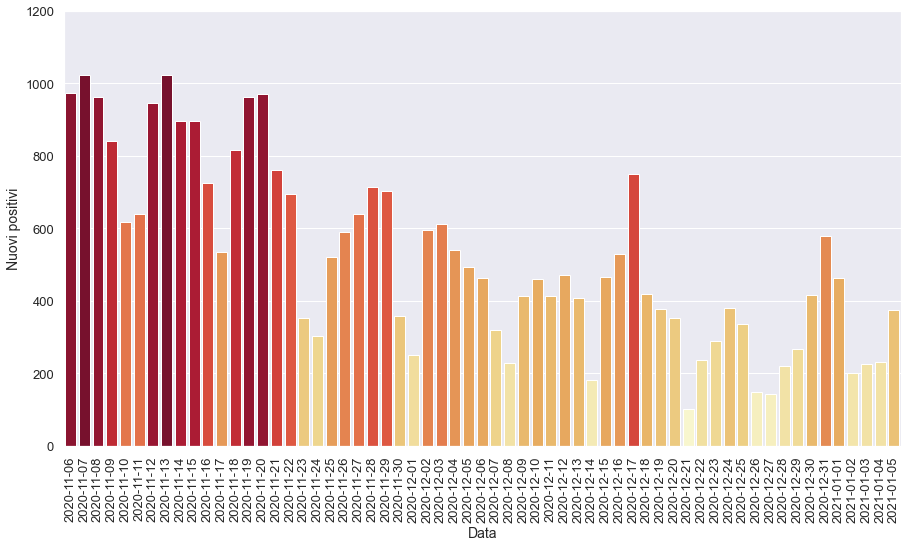

In [8]:
# New positives on new swabs in the last 60 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

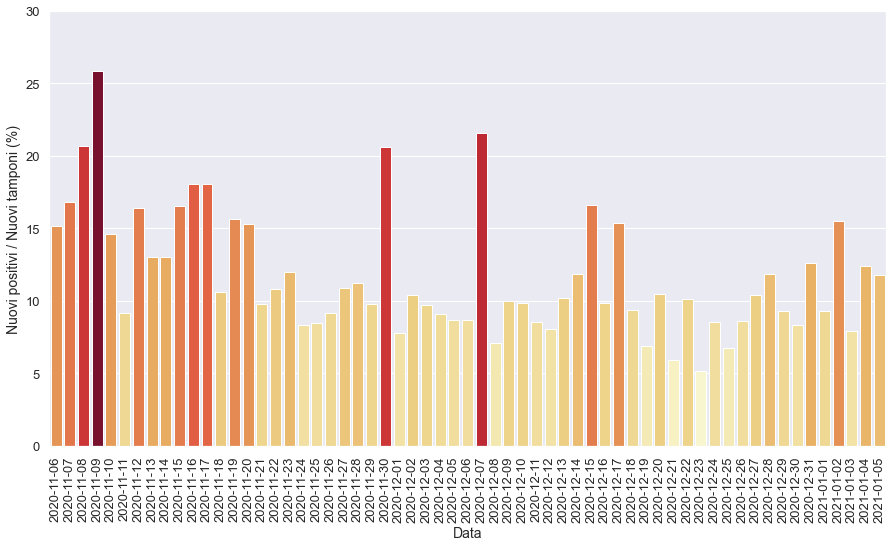

In [9]:
# New positives on new swabs in the last 60 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

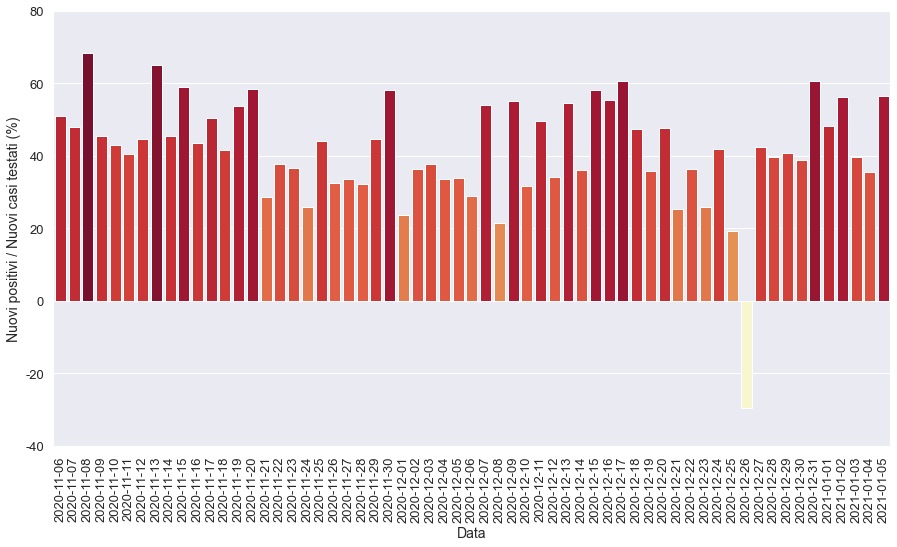

In [10]:
# New positives on new tested cases in the last 60 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

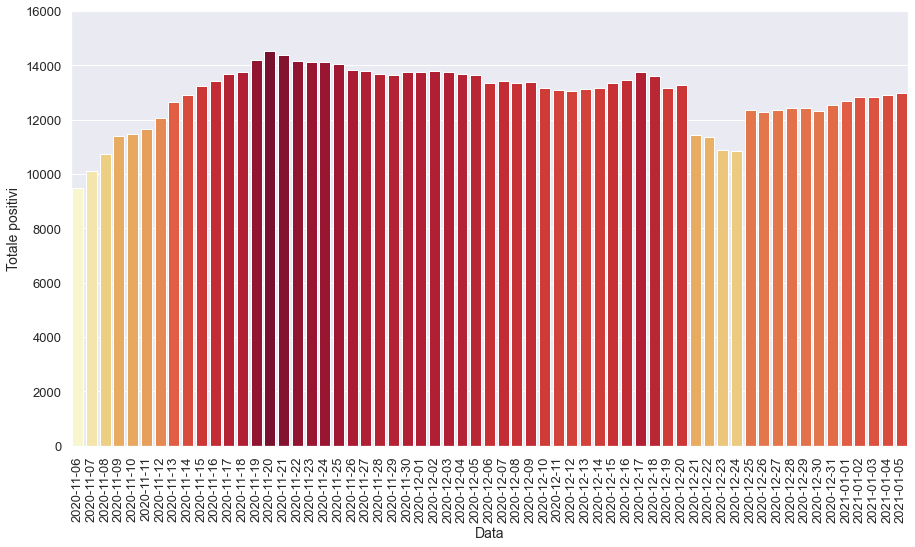

In [11]:
# Percentage of variation of positives in the last 60 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

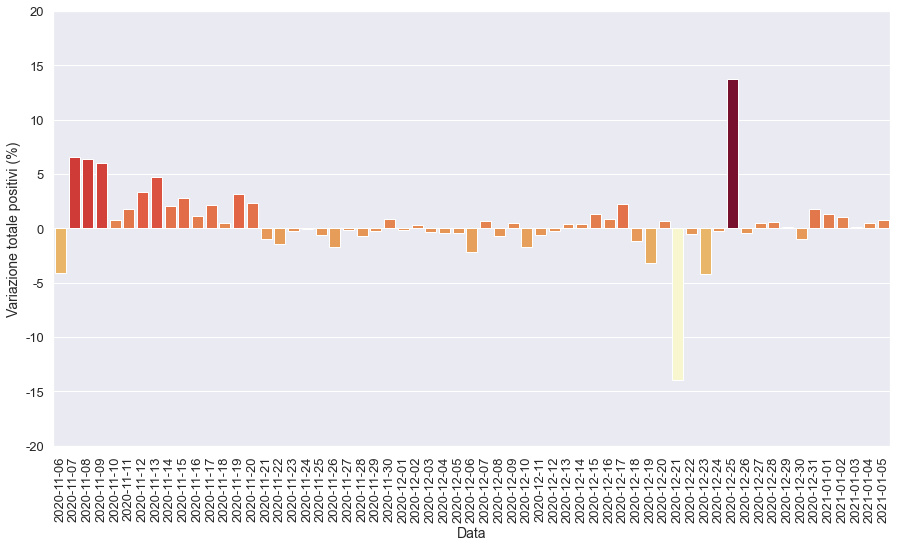

In [12]:
# Percentage of variation of total positives in the last 60 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

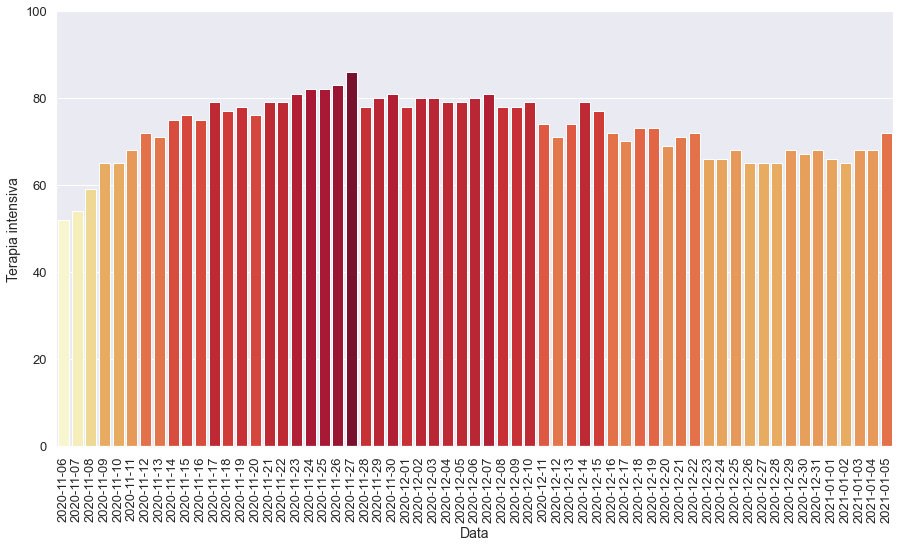

In [13]:
# Positives in ICU in the last 60 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

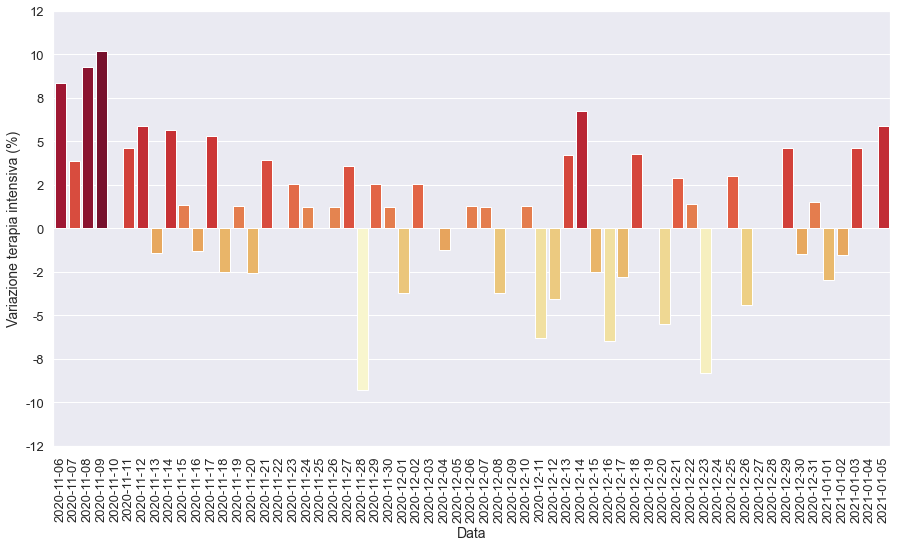

In [14]:
# Percentage of variation of positives in ICU in the last 60 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

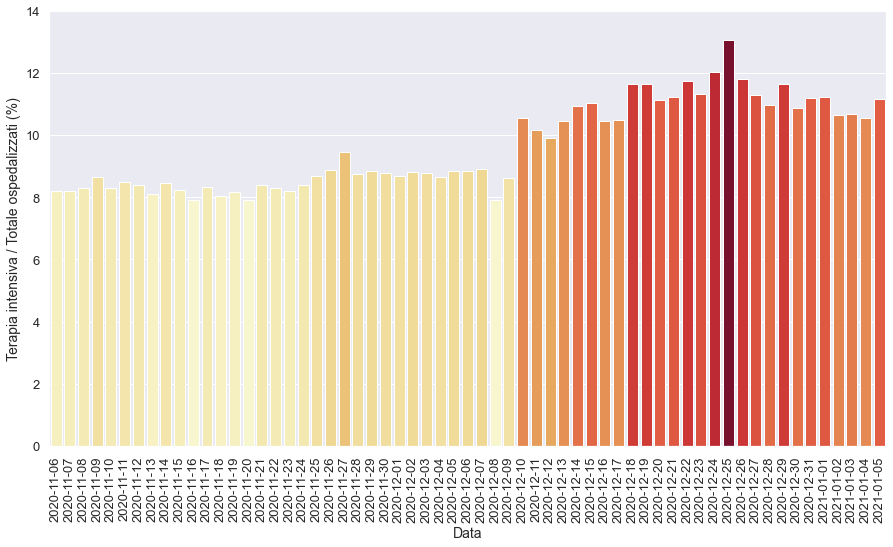

In [15]:
# Positives in ICU in the last 60 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

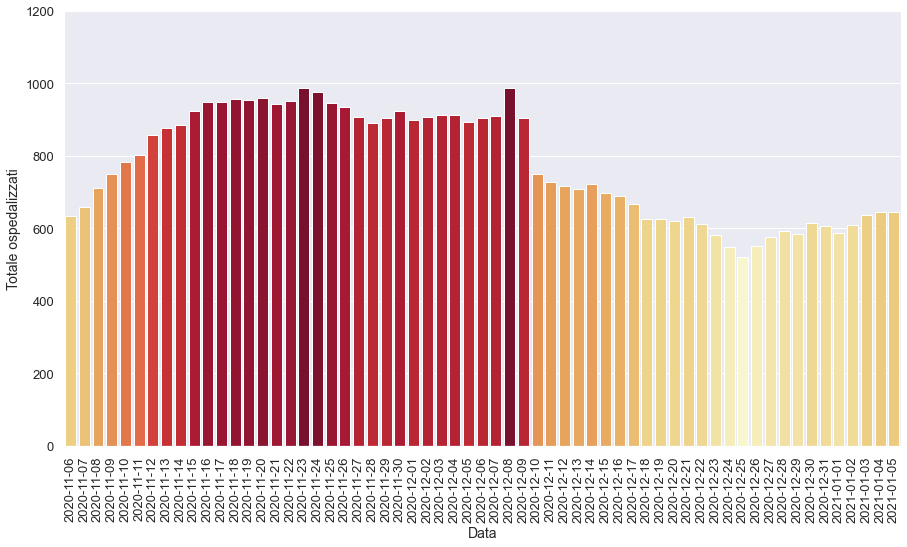

In [16]:
# Hospitalized positives in the last 60 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

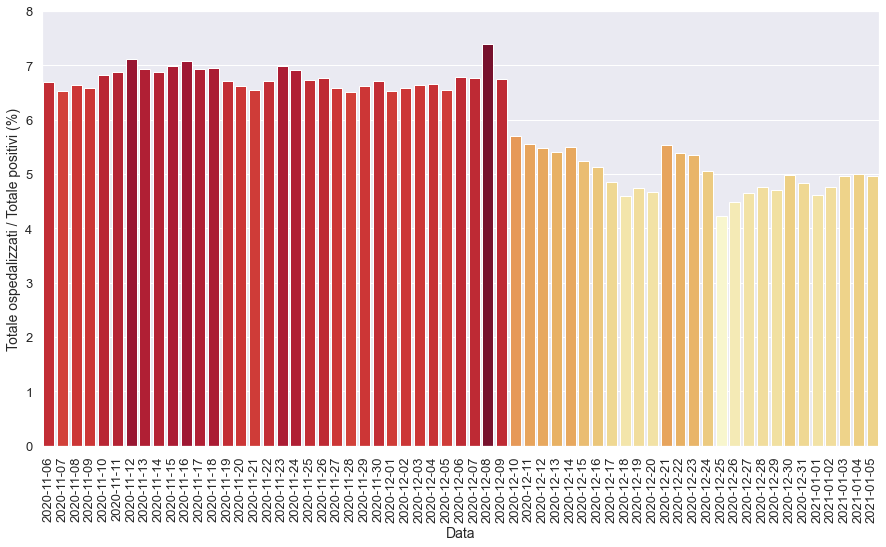

In [17]:
# Hospitalized positives in the last 60 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

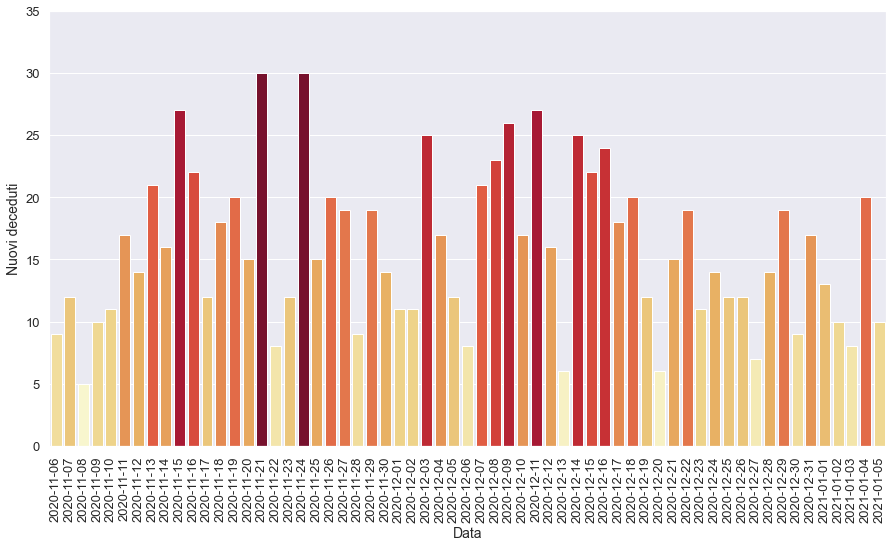

In [18]:
# New deads in the last 60 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

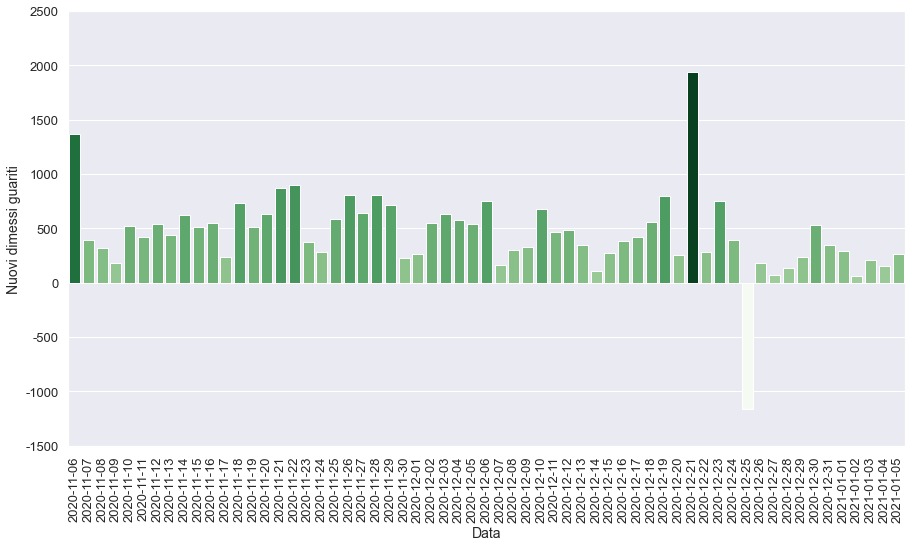

In [19]:
# New healed in the last 60 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [20]:
# TODO: define function
days = 30
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-12-06T17:00:00,4,Trentino-Alto Adige,824,80,904,12434,13338,-293,464,...,8.0,5367.0,1601.0,-304.0,8.85,6.78,8.65,28.98,1.27,-2.15
1,2020-12-07T17:00:00,4,Trentino-Alto Adige,828,81,909,12525,13434,96,320,...,21.0,1481.0,593.0,91.0,8.91,6.77,21.61,53.96,1.25,0.72
2,2020-12-08T17:00:00,4,Trentino-Alto Adige,909,78,987,12353,13340,-94,228,...,23.0,3227.0,1068.0,-172.0,7.90,7.40,7.07,21.35,-3.70,-0.70
3,2020-12-09T17:00:00,4,Trentino-Alto Adige,827,78,905,12495,13400,60,414,...,26.0,4136.0,750.0,142.0,8.62,6.75,10.01,55.20,0.00,0.45
4,2020-12-10T17:00:00,4,Trentino-Alto Adige,670,79,749,12418,13167,-233,461,...,17.0,4673.0,1452.0,-77.0,10.55,5.69,9.87,31.75,1.28,-1.74
5,2020-12-11T17:00:00,4,Trentino-Alto Adige,653,74,727,12363,13090,-77,412,...,27.0,4816.0,829.0,-55.0,10.18,5.55,8.55,49.70,-6.33,-0.58
6,2020-12-12T17:00:00,4,Trentino-Alto Adige,645,71,716,12342,13058,-32,472,...,16.0,5854.0,1384.0,-21.0,9.92,5.48,8.06,34.10,-4.05,-0.24
7,2020-12-13T17:00:00,4,Trentino-Alto Adige,634,74,708,12406,13114,56,408,...,6.0,4007.0,748.0,64.0,10.45,5.40,10.18,54.55,4.23,0.43
8,2020-12-14T17:00:00,4,Trentino-Alto Adige,644,79,723,12443,13166,52,182,...,25.0,1538.0,505.0,37.0,10.93,5.49,11.83,36.04,6.76,0.40
9,2020-12-15T17:00:00,4,Trentino-Alto Adige,620,77,697,12640,13337,171,465,...,22.0,2801.0,800.0,197.0,11.05,5.23,16.60,58.13,-2.53,1.30


In [21]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

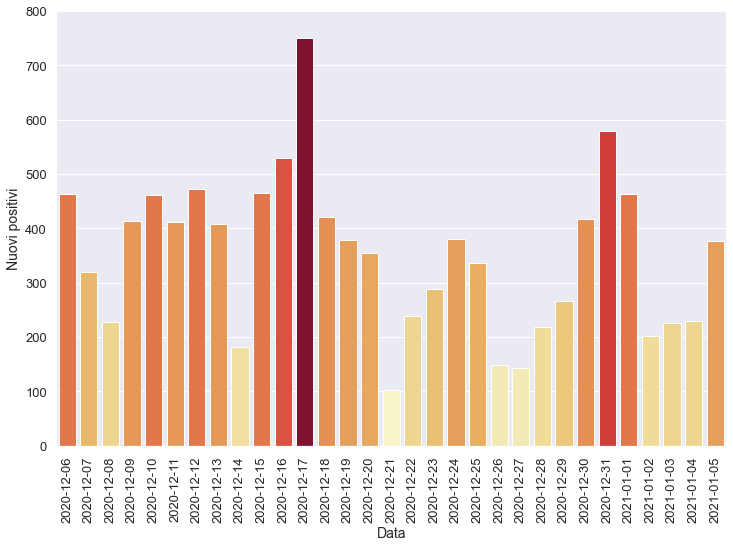

In [22]:
# New positives on new swabs in the last 30 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

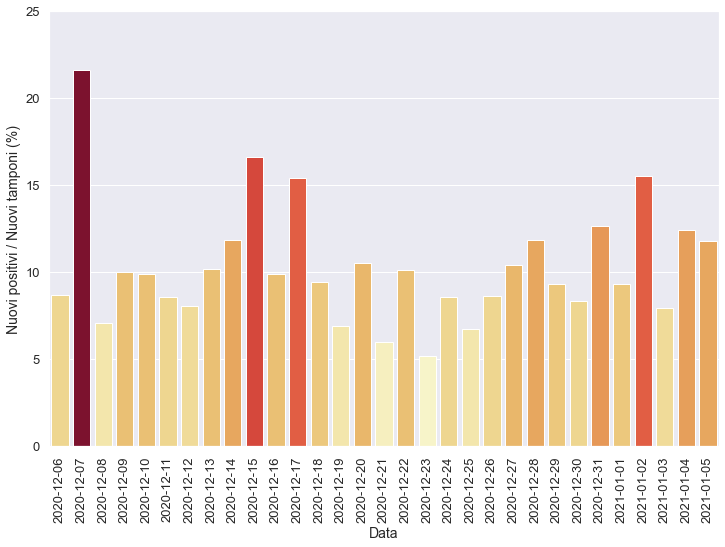

In [23]:
# New positives on new swabs in the last 30 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

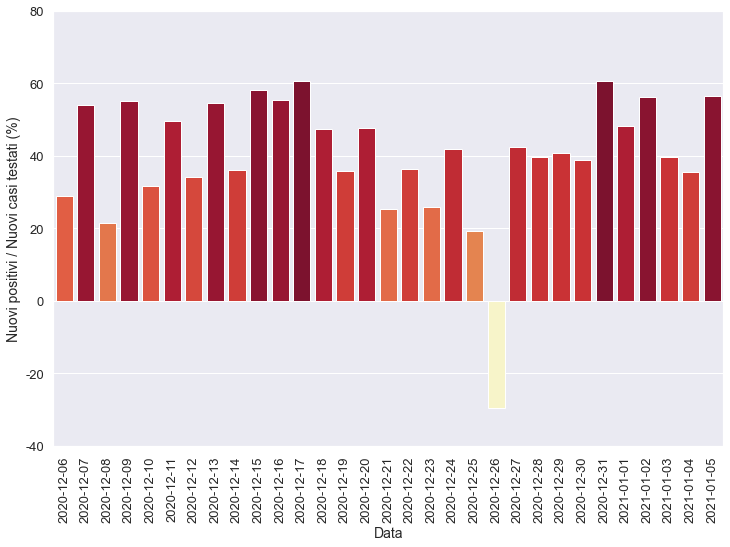

In [24]:
# New positives on new tested cases in the last 30 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

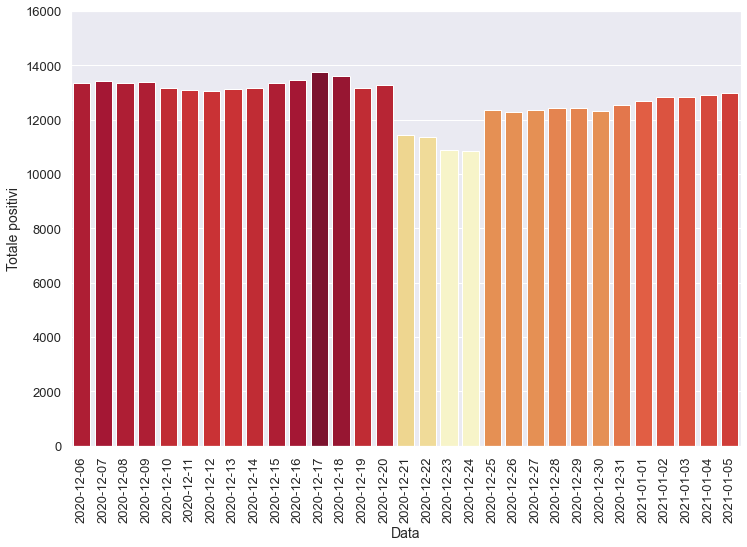

In [25]:
# Number of positives in the last 30 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

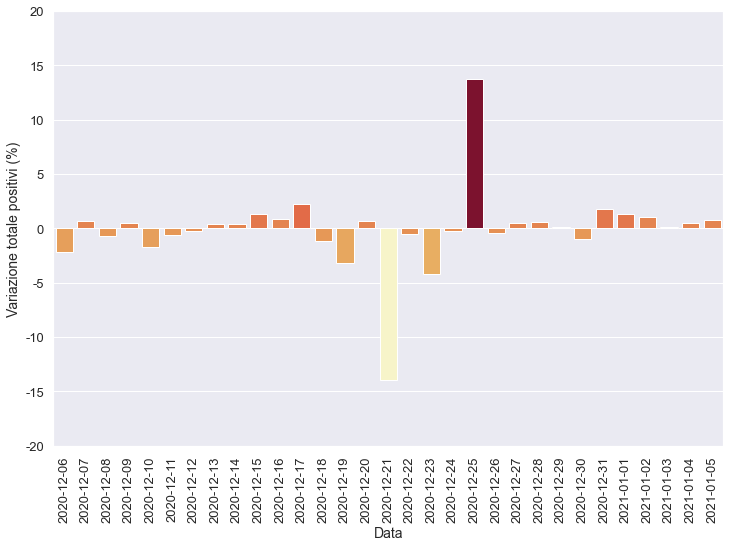

In [26]:
# Percentage of variation of positives in the last 30 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

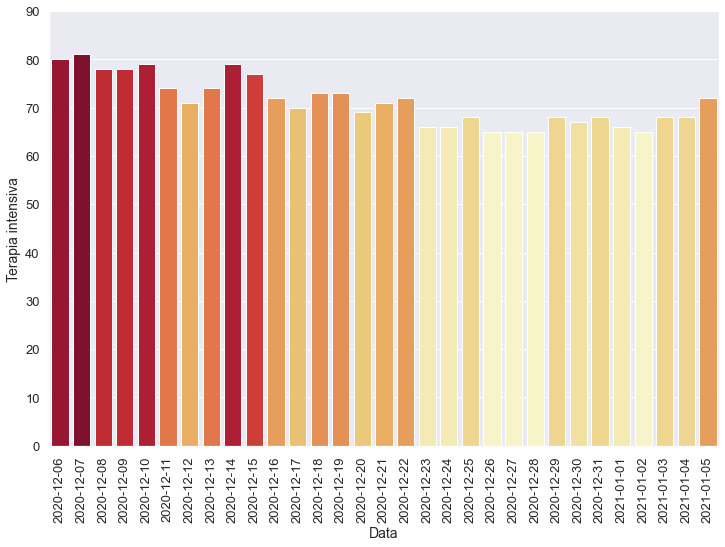

In [27]:
# Positives in ICU in the last 30 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

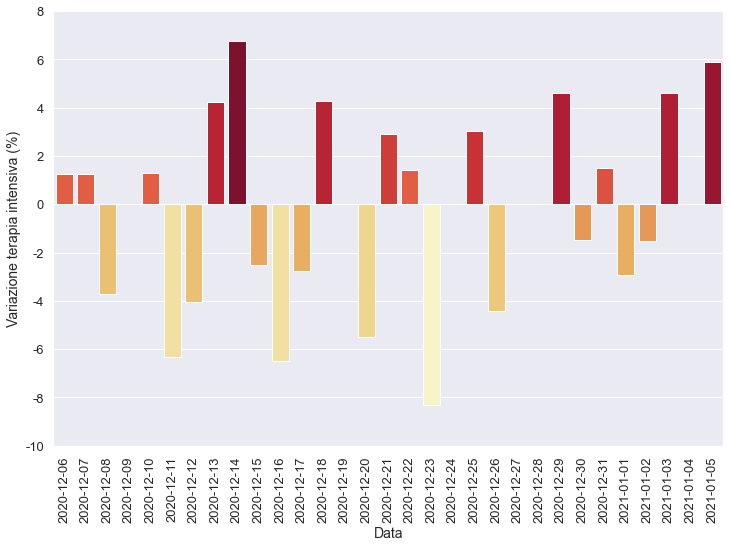

In [28]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

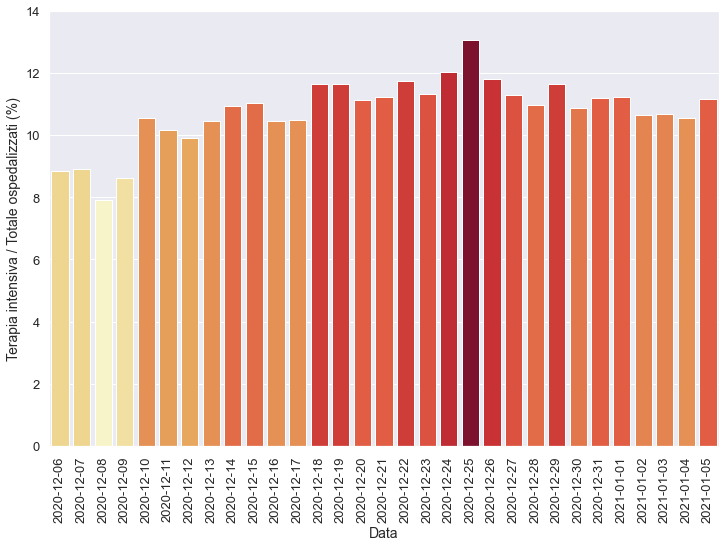

In [29]:
# TODO
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

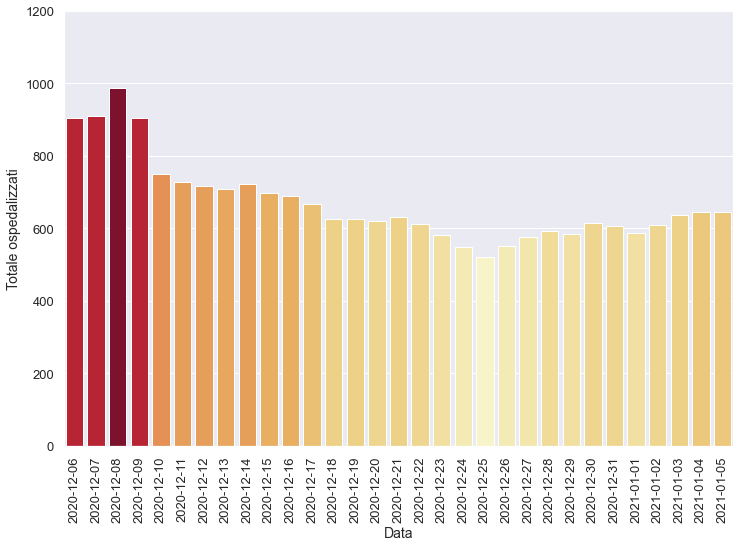

In [30]:
# Hospitalized positives in the last 30 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

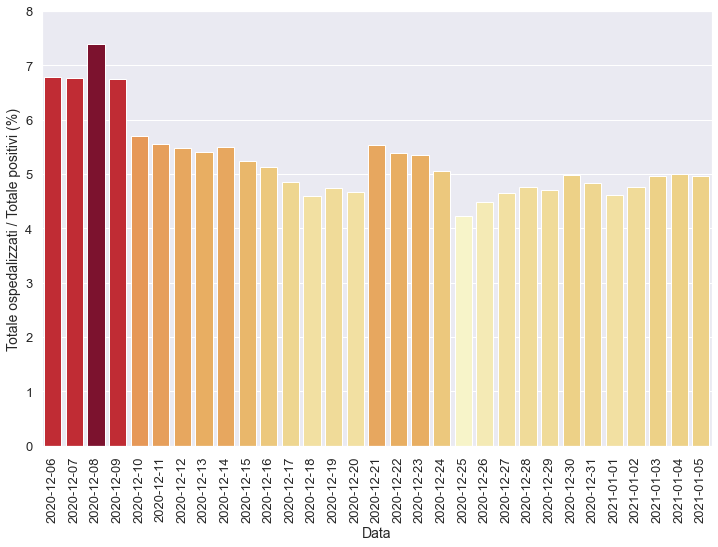

In [31]:
# Hospitalized positives in the last 30 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

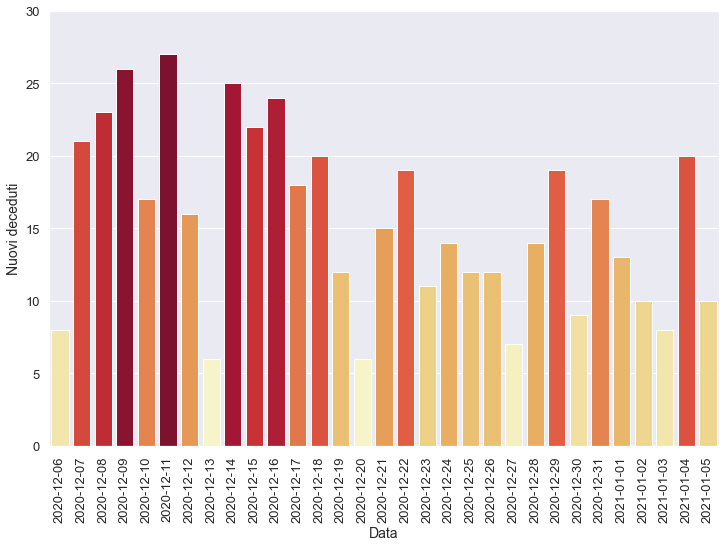

In [32]:
# New deads in the last 30 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

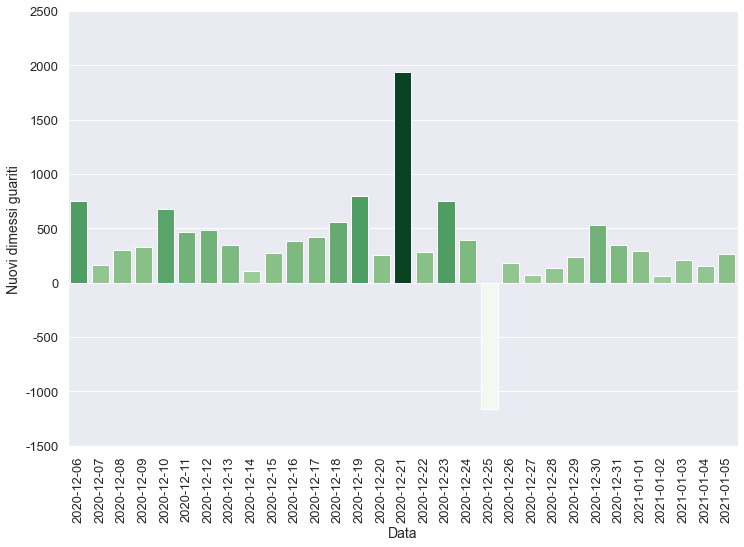

In [33]:
# New healed in the last 30 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [34]:
# TODO: define function
days = 7
path_img = '{path_img_root}/0{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-12-29T17:00:00,4,Trentino-Alto Adige,516,68,584,11854,12438,10,266,...,19.0,2852.0,654.0,18.0,11.64,4.70,9.33,40.67,4.62,0.08
1,2020-12-30T17:00:00,4,Trentino-Alto Adige,548,67,615,11700,12315,-123,417,...,9.0,5003.0,1074.0,-154.0,10.89,4.99,8.33,38.83,-1.47,-0.99
2,2020-12-31T17:00:00,4,Trentino-Alto Adige,539,68,607,11924,12531,216,580,...,17.0,4598.0,957.0,224.0,11.20,4.84,12.61,60.61,1.49,1.75
3,2021-01-01T17:00:00,4,Trentino-Alto Adige,521,66,587,12105,12692,161,463,...,13.0,4978.0,960.0,181.0,11.24,4.62,9.30,48.23,-2.94,1.28
4,2021-01-02T17:00:00,4,Trentino-Alto Adige,545,65,610,12210,12820,128,202,...,10.0,1302.0,359.0,105.0,10.66,4.76,15.51,56.27,-1.52,1.01
5,2021-01-03T17:00:00,4,Trentino-Alto Adige,568,68,636,12195,12831,11,226,...,8.0,2855.0,570.0,-15.0,10.69,4.96,7.92,39.65,4.62,0.09
6,2021-01-04T17:00:00,4,Trentino-Alto Adige,576,68,644,12245,12889,58,230,...,20.0,1852.0,647.0,50.0,10.56,5.00,12.42,35.55,0.00,0.45
7,2021-01-05T17:00:00,4,Trentino-Alto Adige,574,72,646,12343,12989,100,376,...,10.0,3200.0,664.0,98.0,11.15,4.97,11.75,56.63,5.88,0.78


In [35]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

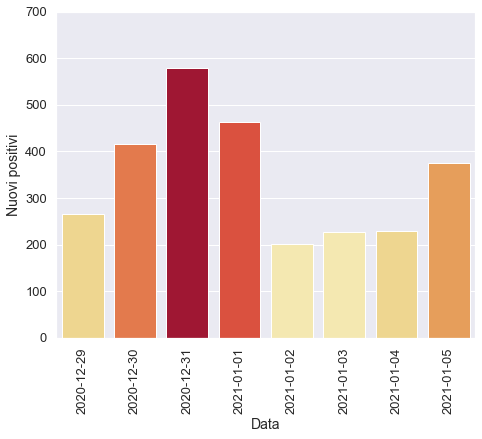

In [36]:
# New positives on new swabs in the last 7 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

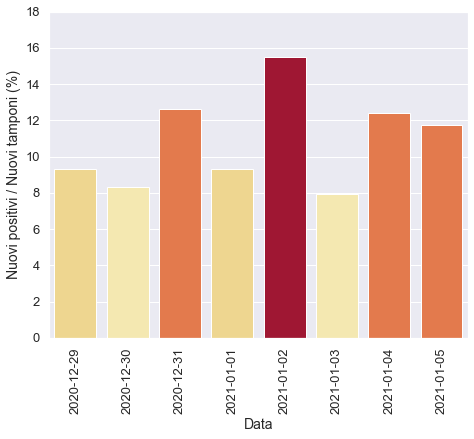

In [37]:
# New positives on new swabs in the last 7 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

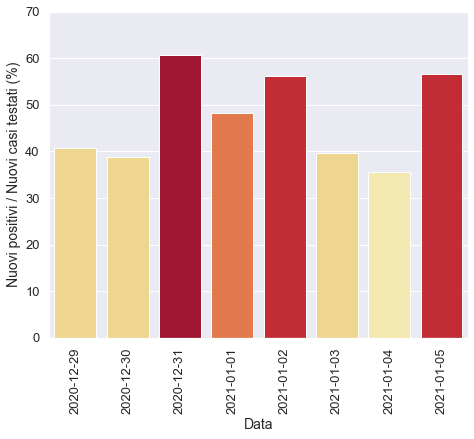

In [38]:
# New positives on new tested cases in the last 7 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

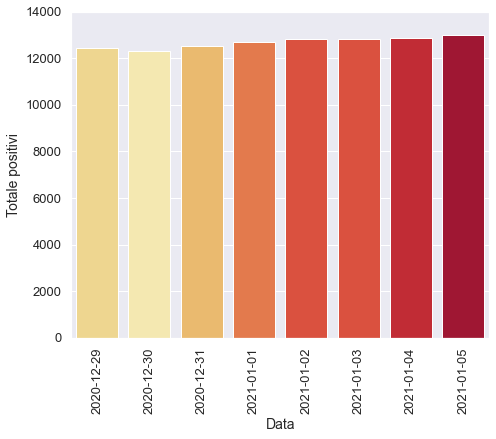

In [39]:
# Percentage of variation of positives in the last 7 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

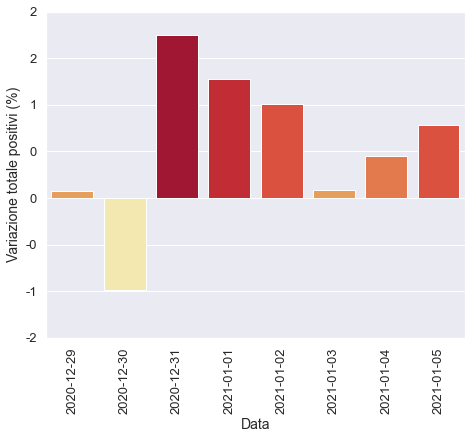

In [40]:
# Percentage of variation of positives in the last 7 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

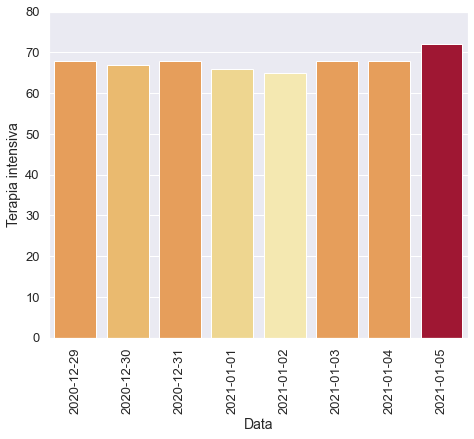

In [41]:
# Positives in ICU in the last 7 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

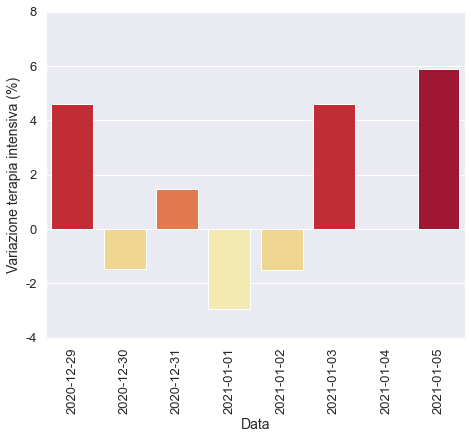

In [42]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

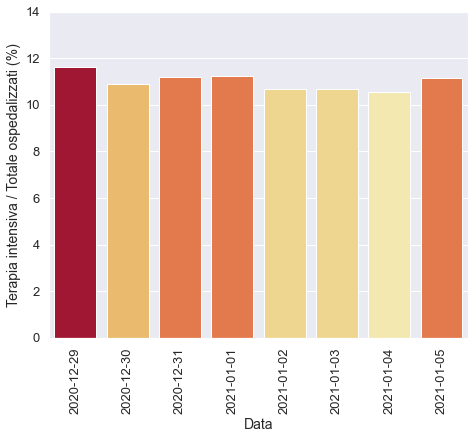

In [43]:
# Positives in ICU in the last 7 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

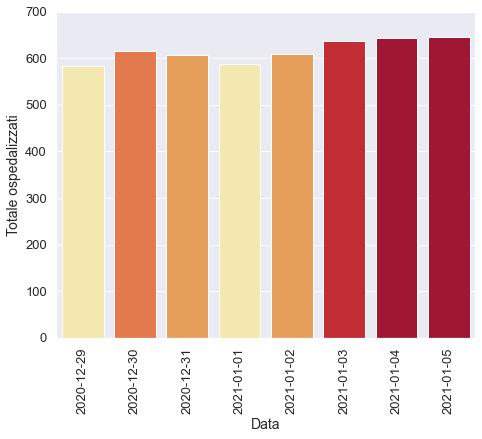

In [44]:
# Hospitalized positives in the last 7 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

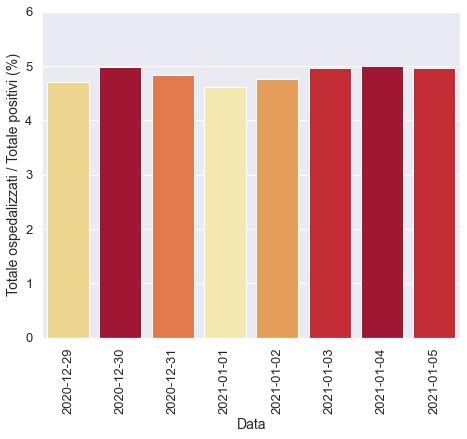

In [45]:
# Hospitalized positives in the last 7 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

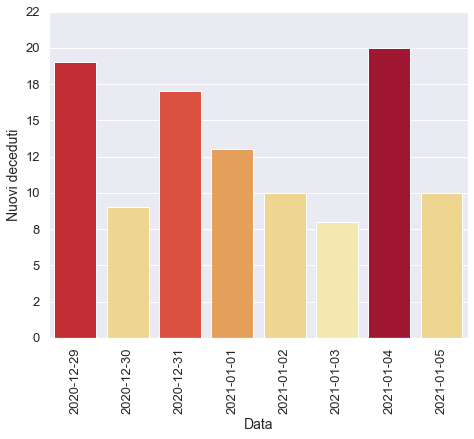

In [46]:
# New deads in the last 7 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

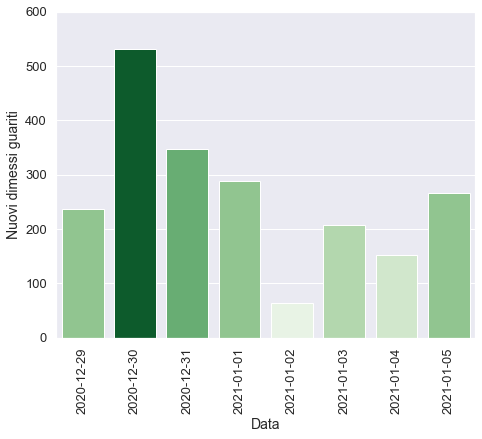

In [47]:
# New healed in the last 7 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)